<a href="https://colab.research.google.com/github/SwathiMenon/Natural-Language-Processing/blob/main/Twitter_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/dataser/abcnews-date-text.csv",usecols=["headline_text"],nrows=10000)

In [ ]:
txt=df.headline_text
txt

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
txt=txt.str.replace('[^a-zA-Z0-9]+'," ")
txt

<ipython-input-18-8baac4b41495>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace('[^a-zA-Z0-9]+'," ")


0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stemmer=PorterStemmer()
txt=txt.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop=stopwords.words("english")
txt=txt.apply(lambda line:[token for token in word_tokenize(line) if token not in stop]).apply(lambda y:" ".join(y))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
txt=txt.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(txt)
print(data_vec)

  (0, 3644)	0.47088217646218244
  (0, 945)	0.4786152427355953
  (0, 1441)	0.34955973806711677
  (0, 1768)	0.40725937234041915
  (0, 146)	0.5110236965882519
  (1, 1782)	0.4921756808813915
  (1, 560)	0.4729217098434841
  (1, 4163)	0.38964572098383743
  (1, 6929)	0.4256166321182425
  (1, 2450)	0.2871157610862832
  (1, 198)	0.34452777801914436
  (2, 6080)	0.5074623354708966
  (2, 4890)	0.49596149094917574
  (2, 3211)	0.603843955663636
  (2, 1061)	0.3631482545495525
  (3, 5275)	0.4032865311963851
  (3, 4573)	0.40863442085309437
  (3, 6022)	0.40126174130834125
  (3, 538)	0.3808058275033573
  (3, 5919)	0.4671270723556268
  (3, 269)	0.38229062089434696
  (4, 6441)	0.4946246151090834
  (4, 542)	0.4138785263344187
  (4, 236)	0.49773233288998325
  (4, 6022)	0.41987466825482267
  :	:
  (9995, 6598)	0.38380819329854754
  (9996, 2122)	0.4880040186486571
  (9996, 6675)	0.4880040186486571
  (9996, 905)	0.40059219855433287
  (9996, 6302)	0.39202641592575405
  (9996, 2728)	0.3813796025454478
  (9996, 69

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


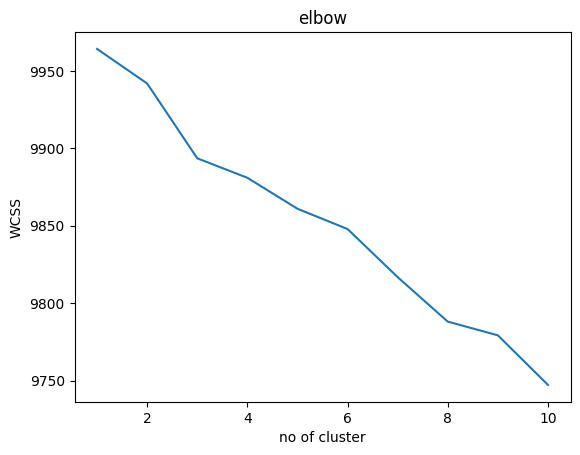

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=1)
  kmeans.fit(data_vec)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("elbow")
plt.xlabel("no of cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
km=KMeans(n_clusters=8,init="k-means++",random_state=1)
y=km.fit_predict(data_vec)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 4, 4], dtype=int32)

In [ ]:
df["cluster"]=y
df

,headline_text,cluster
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,0
2,a g calls for infrastructure protection summit,0
3,air nz staff in aust strike for pay rise,0
4,air nz strike to affect australian travellers,0
...,...,...
9995,us units attack palace as fighting rages in heart,0
9996,vasco win 10 goal thriller in brazil on edmundos,0
9997,vic bushfires inquiry begins,0
9998,vic govt plan aims to reduce water use,4


In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# install wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print ('File downloaded and saved!')

File downloaded and saved!


In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

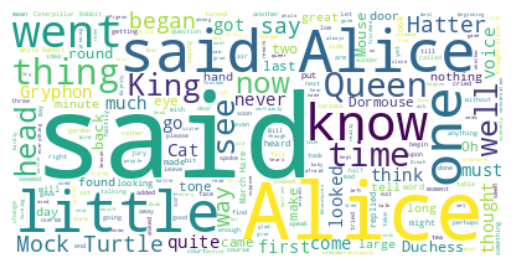

In [ ]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()